In [73]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


url = 'https://raw.githubusercontent.com/advinstai/Aprendizagem-estatistica-classificacao/master/SAheart.data'
s=requests.get(url).content
data_raw=pd.read_csv(io.StringIO(s.decode('utf-8')))
data = data_raw.copy(deep=True)
data['HistFam'] = data.famhist.map(lambda x: 1 if x=='Present' else 0) #--- FamHist 1 == Present, Absent==0

# Data features 
**sbp** :  pressao sanguinea 

**tobacco**:  Tabaco Cumulativo em KG

**ldl**:  Baixa densidade de colesterol lipoproteico

**adiposity** :

**famhist**: Historico familiar de Doenca no coracao 

**typea**:  Comportamento type-A

**obesity**: 

**alcohol**: Atual consumo de alco

**age**: idade

**chd**:  response, coronary heart disease


# Gaussian Naive Bayes
## Todas as colunas relevantes

In [85]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
data_1 = data.drop(columns=['famhist','chd', 'HistFam'])
train_x, test_x, train_y, test_y = train_test_split(data_1[:], data.chd[:, np.newaxis])
gnb = GaussianNB()
gnb.fit(train_x, train_y)
print('Score: ', gnb.score(data_1,data.chd[:, np.newaxis]))



Score:  0.70995670995671


# Gaussian Naive Bayes
## Coluna por Colunas

In [94]:
data_1 = data.drop(columns=['famhist','chd', 'HistFam'])

for column in data.columns:
        try:
            label = data_1[column]
            label = label[:,np.newaxis]
            try:
                train_x, test_x, train_y, test_y = train_test_split(label,data.chd)
                gnb.fit(train_x, train_y)
                target_train = (train_y==1)
                target_test = (test_y==1)
                y_train_pred = gnb.predict(train_x)
                y_test_pred = gnb.predict(test_x)
                print( column.upper() ,'por CHD')
                print('='*50)
                print('Score: ', gnb.score(data_1,data.chd[:, np.newaxis]))

                
                
            except:
                print('Erro 2')
        except:
            print('Erro 1', column)




SBP por CHD
Score:  0.3463203463203463
TOBACCO por CHD
Score:  0.3463203463203463
LDL por CHD
Score:  0.3463203463203463
ADIPOSITY por CHD
Score:  0.6536796536796536
Erro 1 famhist
TYPEA por CHD
Score:  0.3463203463203463
OBESITY por CHD
Score:  0.6536796536796536
ALCOHOL por CHD
Score:  0.6536796536796536
AGE por CHD
Score:  0.6536796536796536
Erro 1 chd
Erro 1 HistFam


# Gaussian Naive Bayes
## MinMaxScaler em Alcol

In [121]:
from sklearn.preprocessing import MinMaxScaler

MMS = MinMaxScaler()
MMS.fit(data.alcohol[:,np.newaxis])
alco = MMS.transform(data.alcohol[:,np.newaxis])
gnb.fit(alco,data.chd)
gnb.score(alco,data.chd)

0.6428571428571429

# Gaussian Naive Bayes
## MinMaxScaler em Dataset

In [127]:
data_trans = MMS.transform(data_1)
gnb.fit(data_trans,data.chd)
gnb.score(data_trans,data.chd)

0.7077922077922078

# Multinomial Naive Bayes

In [148]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix


train_x, test_x, train_y, test_y = train_test_split(data_1, data.chd)
mnb = MultinomialNB(class_prior=[.25,.75])
mnb.fit(train_x,train_y)
y_pred = mnb.predict(test_x)
print(confusion_matrix(y_true=test_y,y_pred=y_pred))
print('Score MultinomialNB: ',mnb.score(test_x,test_y))

[[41 30]
 [16 29]]
Score MultinomialNB:  0.603448275862069


In [486]:
from sklearn.naive_bayes import BernoulliNB

train_x, test_x, train_y, test_y = train_test_split(data_1, data.chd)
bnb = BernoulliNB(binarize=0.5)
mnb = MultinomialNB()
#------------------
bnb.fit(train_x,train_y)
mnb.fit(train_x,train_y)
#---------------------
print('Bernulli Score:', bnb.score(test_x,test_y))
print('Multinomial Score:', mnb.score(test_x,test_y))

y_pred = mnb.predict(test_x)
print(confusion_matrix(y_true=test_y,y_pred=y_pred))

Bernulli Score: 0.6120689655172413
Multinomial Score: 0.7155172413793104
[[57 14]
 [19 26]]


# KNN
# Nearest Centroid

In [490]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
train_x, test_x, train_y, test_y = train_test_split(data_1, data.chd)
nc = NearestCentroid()
nc.fit(train_x, train_y[:, np.newaxis])
print(nc.score(test_x, test_y[:, np.newaxis]))
#nc.predict(test_x)
#nc.centroids_

0.6551724137931034


array([[135.13574661,   2.68972851,   4.27656109,  24.04918552,
         52.06334842,  25.7679638 ,  16.67918552,  38.8280543 ],
       [145.52      ,   5.61208   ,   5.41008   ,  28.32472   ,
         54.512     ,  26.67472   ,  19.26976   ,  50.232     ]])

0.6379310344827587
Importancia das colunas:  [0.13297869 0.07464574 0.12901241 0.13902148 0.09212874 0.09648827
 0.08993786 0.24578681]


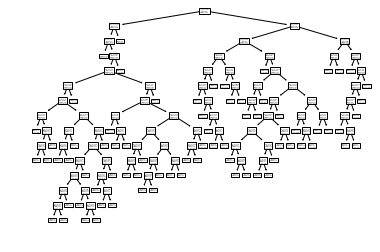

In [491]:
from sklearn import tree
train_x, test_x, train_y, test_y = train_test_split(data_1, data.chd)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x,train_y[:,np.newaxis])

print(clf.score(test_x,test_y[:,np.newaxis]))
print('Importancia das colunas: ', clf.feature_importances_)
#print(data_1.columns)
tree.plot_tree(clf.fit(train_x,train_y[:,np.newaxis]))
plt.show()

# Logistic Regression

In [498]:
from sklearn.linear_model import LogisticRegression
train_x, test_x, train_y, test_y = train_test_split(data_1, data.chd, test_size=.3)
lr = LogisticRegression()
lr.fit(train_x, train_y[:,np.newaxis])
print('score LogisticRegression\n: ',confusion_matrix(lr.predict(test_x),test_y))

score LogisticRegression
:  [[84 29]
 [ 8 18]]


# SGDClassifier

In [547]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.partial_fit(train_x[:,np.newaxis], train_y, classes=[0,1])
print('score SGD: ', sgd.score(test_x[:,np.newaxis],test_y))

score SGD:  0.6187050359712231


# LR com PolynomialFeatures

In [555]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=2)

x_tf = pol.fit_transform(data_1)
train_x, test_x, train_y, test_y = train_test_split(x_tf, data.chd, test_size=.3)
lr.fit(train_x, train_y)
lr.score(test_x,test_y)


0.6690647482014388

# KNN

In [567]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5)
rnc = RadiusNeighborsClassifier(radius=5)

train_x, test_x, train_y, test_y = train_test_split(data_1, data.chd, test_size=.3)
knc.fit(train_x, train_y[:,np.newaxis])
rnc.fit(train_x, train_y[:,np.newaxis])
print(knc.score(test_x,test_y))
#print(rnc.score(test_x,test_y))

0.6618705035971223


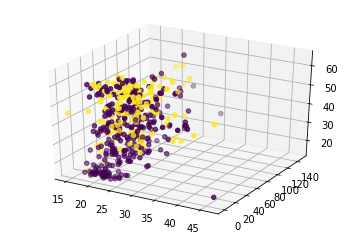

In [598]:
from mpl_toolkits.mplot3d import Axes3D
train_x, test_x, train_y, test_y = train_test_split(data_1.alcohol, data.chd, test_size=.3)

#col = np.sum(np.square(train_x[:,np.newaxis], train_y[:,np.newaxis]))
Z = np.hstack([train_x[:,np.newaxis]])
f = plt.figure()
ax = f.add_subplot(111,projection='3d')
ax.scatter3D(xs=data_1.obesity, ys=data_1.alcohol, zs=data_1.age, c=data.chd)
plt.show()

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')

train_x, test_x, train_y, test_y = train_test_split(data_1.alcohol, data.chd, test_size=.3)

svc.fit(train_x[:,np.newaxis],train_y)
print('Score: ',svc.score(test_x[:,np.newaxis],test_y))


In [ ]:
svc = SVC(kernel='poly')

train_x, test_x, train_y, test_y = train_test_split(data_1.alcohol, data.chd, test_size=.3)

svc.fit(train_x[:,np.newaxis],train_y)
print('Score: ',svc.score(test_x[:,np.newaxis],test_y))
